In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=19fea82f43d111b710491185e8c6246c8536fac28a8be3c7c605707c593606d0
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


#1.  Import libraries









In [ ]:
import pandas as pd
import re
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import streamlit as st


#2. Loading our dataset

In [ ]:
pc=pd.read_csv("mytek.csv")
pc

,web-scraper-order,web-scraper-start-url,select,select-href,pagination,prod,prod-href,dispo,gtin,marque,...,memoire_cache,ram,disque_dur,type_disk,carte_graphic,chipset_carte,connectors,couleur,grantie,prix
0,1683666238-46,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,Pc Portable DELL Vostro 3510 i3 11è Gén 4Go 25...,https://www.mytek.tn/pc-portable-dell-vostro-3...,En stock,3510-I3-256SSD,DELL,...,6 Mo,4 Go,256 Go SSD,SSD,Graphique Intégrée,Intel UHD,"1x USB 3.2 Gen 1, 1xUSB-C 3.2 Gen 1, 1xUSB 2.0...",Noir,1 an,NaN
1,1683666238-78,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,Pc Portable DELL Vostro 3510 i3 11è Gén 20Go 1...,https://www.mytek.tn/pc-portable-dell-vostro-3...,En stock,735775-3510-20G,DELL,...,6 Mo,20 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,"1x USB 3.2 Gen 1, 1x USB-C 3.2 Gen 1, 1x USB 2...",Noir,1 an,NaN
2,1683666246-1,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,PC Portable LENOVO IdeaPad 3 15IML05 i3 10è Gé...,https://www.mytek.tn/pc-portable-lenovo-ideapa...,En stock,81WB00XVFG-8G,LENOVO,...,4 Mo,8 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,"1x USB 2.0, 2x USB 3.2 Gen 1, 1x HDMI 1.4b, 1x...",Bleu,1 an,"999,000 DT"
3,1683666249-2,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,PC Portable LENOVO IdeaPad 3 15IML05 i3 10è Gé...,https://www.mytek.tn/pc-portable-lenovo-ideapa...,En stock,81WB00XYFG-12G,LENOVO,...,4 Mo,12 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,"1x USB 2.0, 2x USB 3.2 Gen 1, 1x HDMI 1.4b, 1x...",Bleu,1 an,"Prix spécial 999,000 DT Ancien prix 1 079..."
4,1683666252-3,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,Pc Portable DELL Vostro 3510 i3 11è Gén 8Go 1T...,https://www.mytek.tn/pc-portable-dell-vostro-3...,En stock,735775-3510-8G,DELL,...,6 Mo,8 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,"1x USB 3.2 Gen 1, 1x USB-C 3.2 Gen 1, 1x USB 2...",Noir,1 an,"Prix spécial 999,000 DT Ancien prix 1 095..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1683669425-956,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,NaN,PC Portable LENOVO IdeaPad 3 15ADA05 AMD Athlo...,https://www.mytek.tn/pc-portable-lenovo-ideapa...,En arrivage,BU-81W101G8FG,LENOVO,...,4 Mo,4 Go,1 To HDD,HDD,AMD Radeon,AMD Radeon,"1x USB 2.0, 2x USB 3.2 Gen 1, 1x HDMI 1.4b, 1x...",Noir,1 an,"655,000 DT"
958,1683669428-957,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,NaN,PC Portable LENOVO IdeaPad 3 15ADA05 AMD Athlo...,https://www.mytek.tn/pc-portable-lenovo-ideapa...,En arrivage,81W101G8FG,LENOVO,...,4 Mo,4 Go,1 To HDD,HDD,AMD Radeon,AMD Radeon,"1x USB 2.0, 2x USB 3.2 Gen 1, 1x HDMI 1.4b, 1x...",Noir,1 an,"Prix spécial 649,000 DT Ancien prix 749,0..."
959,1683669431-958,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,NaN,PC Portable LENOVO IdeaPad 3 15ADA05 AMD Athlo...,https://www.mytek.tn/pc-portable-lenovo-ideapa...,En stock,81W101L7FE,LENOVO,...,4 Mo,4 Go,1 To HDD,HDD,AMD Radeon,AMD Radeon,"1x USB 2.0, 2x USB 3.2 Gen 1, 1x HDMI 1.4b, 1x...",Noir,1 an,"649,000 DT"
960,1683669434-959,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,NaN,PC Portable LENOVO IdeaPad 3 15ADA05 AMD Athlo...,https://www.mytek.tn/pc-portable-lenovo-ideapa...,En arrivage,81W101G3FG-8G,LENOVO,...,4 Mo,8 Go,1 To HDD,HDD,AMD Radeon,AMD Radeon,"1xUSB 2.0, 2x USB 3.2 Gen 1, 1x HDMI 1.4b, 1x ...",Gris,1 an,"Prix spécial 635,000 DT Ancien prix 685,0

#3. Exploration and cleaning our data

##*getting a quick overview of our data*

In [ ]:
pc.head()

,web-scraper-order,web-scraper-start-url,select,select-href,pagination,prod,prod-href,dispo,gtin,marque,...,memoire_cache,ram,disque_dur,type_disk,carte_graphic,chipset_carte,connectors,couleur,grantie,prix
0,1683666238-46,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,Pc Portable DELL Vostro 3510 i3 11è Gén 4Go 25...,https://www.mytek.tn/pc-portable-dell-vostro-3...,En stock,3510-I3-256SSD,DELL,...,6 Mo,4 Go,256 Go SSD,SSD,Graphique Intégrée,Intel UHD,"1x USB 3.2 Gen 1, 1xUSB-C 3.2 Gen 1, 1xUSB 2.0...",Noir,1 an,NaN
1,1683666238-78,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,Pc Portable DELL Vostro 3510 i3 11è Gén 20Go 1...,https://www.mytek.tn/pc-portable-dell-vostro-3...,En stock,735775-3510-20G,DELL,...,6 Mo,20 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,"1x USB 3.2 Gen 1, 1x USB-C 3.2 Gen 1, 1x USB 2...",Noir,1 an,NaN
2,1683666246-1,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,PC Portable LENOVO IdeaPad 3 15IML05 i3 10è Gé...,https://www.mytek.tn/pc-portable-lenovo-ideapa...,En stock,81WB00XVFG-8G,LENOVO,...,4 Mo,8 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,"1x USB 2.0, 2x USB 3.2 Gen 1, 1x HDMI 1.4b, 1x...",Bleu,1 an,"999,000 DT"
3,1683666249-2,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,PC Portable LENOVO IdeaPad 3 15IML05 i3 10è Gé...,https://www.mytek.tn/pc-portable-lenovo-ideapa...,En stock,81WB00XYFG-12G,LENOVO,...,4 Mo,12 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,"1x USB 2.0, 2x USB 3.2 Gen 1, 1x HDMI 1.4b, 1x...",Bleu,1 an,"Prix spécial 999,000 DT Ancien prix 1 079..."
4,1683666252-3,https://www.mytek.tn/,Ordinateurs portables,https://www.mytek.tn/informatique/ordinateurs-...,https://www.mytek.tn/informatique/ordinateurs-...,Pc Portable DELL Vostro 3510 i3 11è Gén 8Go 1T...,https://www.mytek.tn/pc-portable-dell-vostro-3...,En stock,735775-3510-8G,DELL,...,6 Mo,8 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,"1x USB 3.2 Gen 1, 1x USB-C 3.2 Gen 1, 1x USB 2...",Noir,1 an,"Prix spécial 999,000 DT Ancien prix 1 095..."


In [ ]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      962 non-null    object 
 1   web-scraper-start-url  962 non-null    object 
 2   select                 962 non-null    object 
 3   select-href            962 non-null    object 
 4   pagination             937 non-null    object 
 5   prod                   962 non-null    object 
 6   prod-href              962 non-null    object 
 7   dispo                  962 non-null    object 
 8   gtin                   934 non-null    object 
 9   marque                 962 non-null    object 
 10  gamme                  959 non-null    object 
 11  gamer                  962 non-null    object 
 12  systeme                0 non-null      float64
 13  taille_ecran           0 non-null      float64
 14  resolution             959 non-null    object 
 15  proces

In [ ]:
pc.describe()

,systeme,taille_ecran
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


##Identifying and handling missing values

In [ ]:
#Checking for missing values
pc.isnull().sum()

web-scraper-order          0
web-scraper-start-url      0
select                     0
select-href                0
pagination                25
prod                       0
prod-href                  0
dispo                      0
gtin                      28
marque                     0
gamme                      3
gamer                      0
systeme                  962
taille_ecran             962
resolution                 3
processeur                 1
type_processeur           10
ref_proc                   2
freq_processeur            1
memoire_cache             11
ram                        1
disque_dur                 1
type_disk                  1
carte_graphic              1
chipset_carte              1
connectors                 0
couleur                    2
grantie                    0
prix                       2
dtype: int64

In [ ]:
#dropping the unnecessary columns
pc=pc.drop(columns=['web-scraper-order','dispo','processeur','web-scraper-start-url','connectors','gtin','couleur'	,'select'	,'select-href',	'pagination'	,'prod',	'prod-href','gamme','systeme','taille_ecran'], axis=1)

In [ ]:
#dropping missing values (columns with NaN)
pc=pc.dropna()

In [ ]:
pc.isnull().sum()

marque             0
gamer              0
resolution         0
type_processeur    0
ref_proc           0
freq_processeur    0
memoire_cache      0
ram                0
disque_dur         0
type_disk          0
carte_graphic      0
chipset_carte      0
grantie            0
prix               0
dtype: int64

##Some visualization

In [ ]:
pc['prix'].value_counts()

2 279,000 DT                                                       8
1 189,000 DT                                                       6
969,000 DT                                                         5
2 399,000 DT                                                       5
2 979,000 DT                                                       5
                                                                  ..
Prix spécial 2 029,000 DT      Ancien prix 2 189,000 DT  -160DT    1
Prix spécial 2 029,000 DT      Ancien prix 2 069,000 DT  -40DT     1
Prix spécial 2 035,000 DT      Ancien prix 2 095,000 DT  -60DT     1
Prix spécial 2 049,000 DT      Ancien prix 2 099,000 DT  -50DT     1
Prix spécial 635,000 DT      Ancien prix 685,000 DT  -50DT         1
Name: prix, Length: 687, dtype: int64

In [ ]:
#dropping string of form "-?\d+DT"
prix=[]
for price in pc['prix']:
    clean_text = re.sub(r'-?\d+DT', '', price)
    prix.append(clean_text)
prix

['999,000\xa0DT',
 'Prix spécial 999,000\xa0DT      Ancien prix 1\xa0079,000\xa0DT  ',
 'Prix spécial 999,000\xa0DT      Ancien prix 1\xa0095,000\xa0DT  ',
 '999,000\xa0DT',
 '995,000\xa0DT',
 '989,000\xa0DT',
 'Prix spécial 985,000\xa0DT      Ancien prix 1\xa0129,000\xa0DT  ',
 'Prix spécial 985,000\xa0DT      Ancien prix 1\xa0129,000\xa0DT  ',
 'Prix spécial 979,000\xa0DT      Ancien prix 1\xa0049,000\xa0DT  ',
 'Prix spécial 979,000\xa0DT      Ancien prix 1\xa0049,000\xa0DT  ',
 '979,000\xa0DT',
 '979,000\xa0DT',
 'Prix spécial 975,000\xa0DT      Ancien prix 1\xa0029,000\xa0DT  ',
 'Prix spécial 969,000\xa0DT      Ancien prix 1\xa0169,000\xa0DT  ',
 'Prix spécial 969,000\xa0DT      Ancien prix 1\xa0169,000\xa0DT  ',
 '969,000\xa0DT',
 '969,000\xa0DT',
 '969,000\xa0DT',
 '969,000\xa0DT',
 '969,000\xa0DT',
 'Prix spécial 965,000\xa0DT      Ancien prix 1\xa0149,000\xa0DT  ',
 'Prix spécial 965,000\xa0DT      Ancien prix 1\xa0149,000\xa0DT  ',
 'Prix spécial 955,000\xa0DT      Ancien pr

In [ ]:
#dropping string 'Prix spécial|Ancien prix|\xa0|DT|\u202f'
prixx=[]
for price in prix:
    clean_text = re.sub(r'Prix spécial|Ancien prix|\xa0|DT|\u202f', '', price)
    prixx.append(clean_text)
prixx

['999,000',
 ' 999,000       1079,000  ',
 ' 999,000       1095,000  ',
 '999,000',
 '995,000',
 '989,000',
 ' 985,000       1129,000  ',
 ' 985,000       1129,000  ',
 ' 979,000       1049,000  ',
 ' 979,000       1049,000  ',
 '979,000',
 '979,000',
 ' 975,000       1029,000  ',
 ' 969,000       1169,000  ',
 ' 969,000       1169,000  ',
 '969,000',
 '969,000',
 '969,000',
 '969,000',
 '969,000',
 ' 965,000       1149,000  ',
 ' 965,000       1149,000  ',
 ' 955,000       1059,000  ',
 '949,000',
 ' 945,000       995,000  ',
 ' 1035,000       1225,000  ',
 ' 1035,000       1225,000  ',
 '1035,000',
 ' 1035,000       1165,000  ',
 '1035,000',
 '1025,000',
 ' 1025,000       1109,000  ',
 ' 1025,000       1109,000  ',
 ' 1025,000       1109,000  ',
 ' 1019,000       1165,000  ',
 ' 1019,000       1125,000  ',
 '1015,000',
 ' 1015,000       1085,000  ',
 '1015,000',
 ' 1015,000       1085,000  ',
 '1009,000',
 ' 1009,000       1089,000  ',
 '1009,000',
 ' 1005,000       1179,000  ',
 ' 1

In [ ]:
#splitting column and selecting the first element
l1=[]
parts=[]
for line in prixx:

    parts = line.split('  ')
    l1.append(parts[0])
pc['prix']=l1
pc['prix']

2       999,000
3       999,000
4       999,000
5       999,000
6       995,000
         ...   
956     675,000
957     655,000
958     649,000
959     649,000
960     635,000
Name: prix, Length: 946, dtype: object

In [ ]:
#replace "," by "." in the column prix
x=[]
for i in pc["prix"]:
  x.append(i.replace(",", "."))
pc['prix']=x

In [ ]:
#convert the type of "prix" into float
pc['prix']=pc['prix'].astype("float")

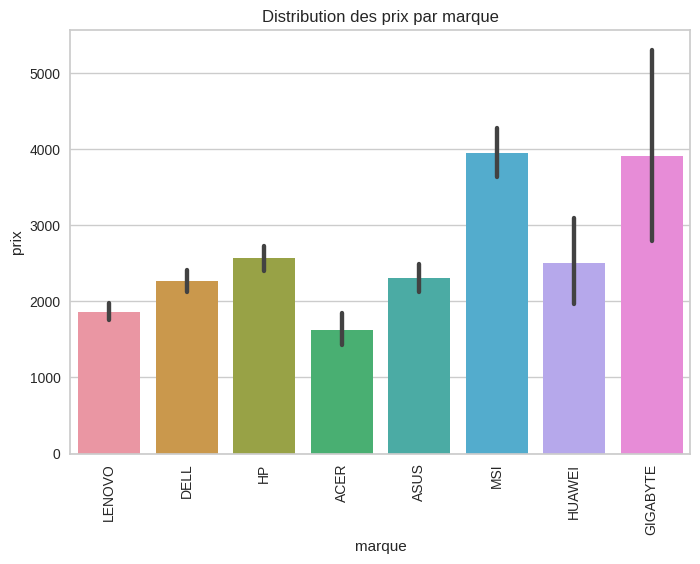

In [ ]:
#Price Distribution by Brand
sns.barplot(x=pc['marque'], y=pc['prix'])
plt.xticks(rotation='vertical')
plt.title('Distribution des prix par marque')
plt.show()

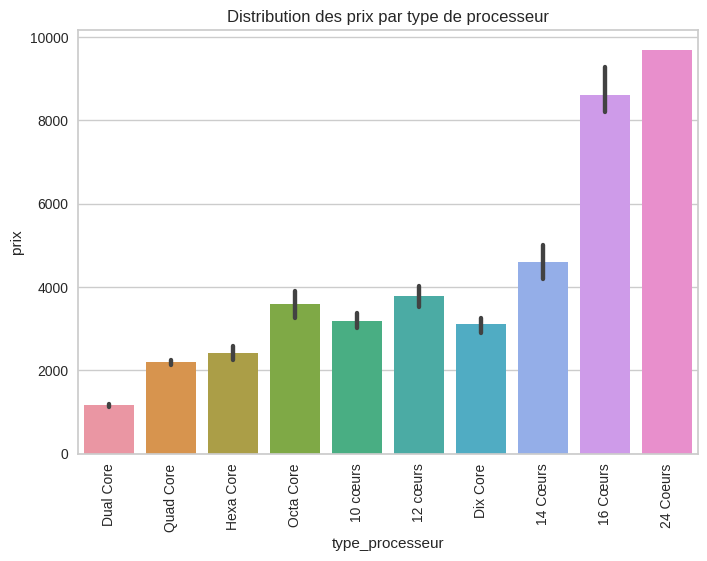

In [ ]:
#Price Distribution by type of processeur
sns.barplot(x=pc['type_processeur'], y=pc['prix'])
plt.xticks(rotation='vertical')
plt.title('Distribution des prix par type de processeur')
plt.show()

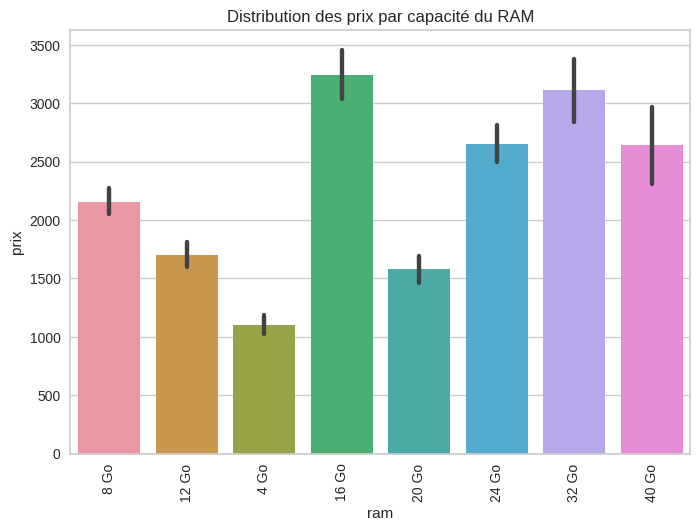

In [ ]:
sns.barplot(x=pc['ram'], y=pc['prix'])
plt.xticks(rotation='vertical')
plt.title('Distribution des prix par capacité du RAM')
plt.show()

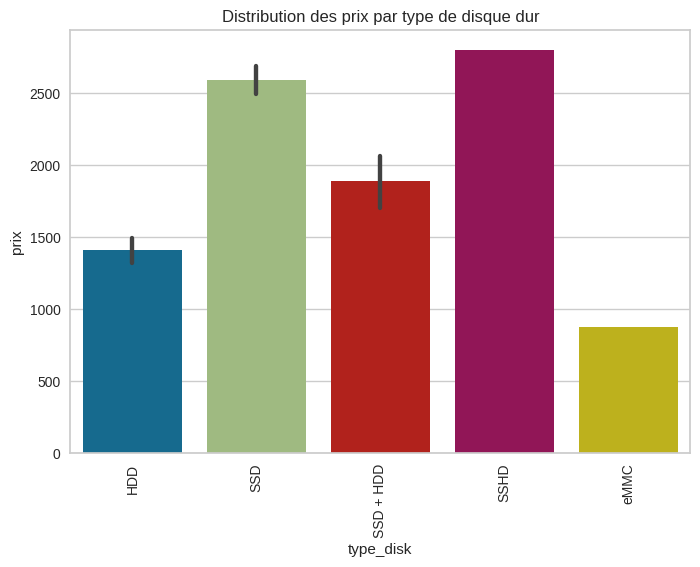

In [ ]:
#Price Distribution by type of hard drive
sns.barplot(x=pc['type_disk'], y=pc['prix'])
plt.xticks(rotation='vertical')
plt.title('Distribution des prix par type de disque dur')
plt.show()

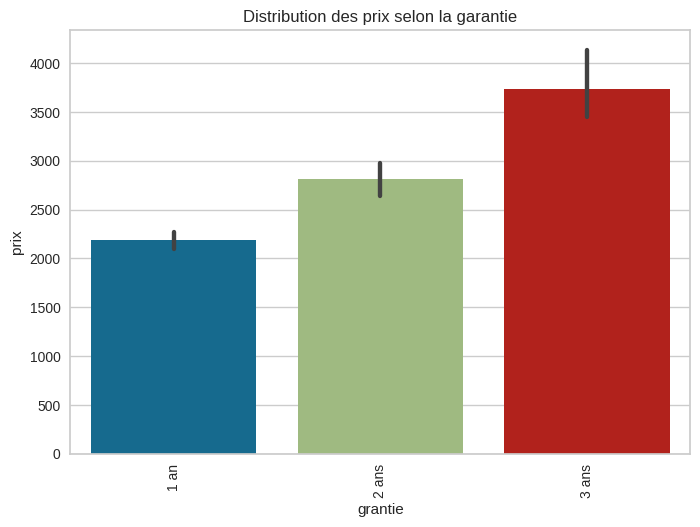

In [ ]:
#Distribution of Prices Based on Warranty
sns.barplot(x=pc['grantie'], y=pc['prix'])
plt.xticks(rotation='vertical')
plt.title('Distribution des prix selon la garantie')
plt.show()

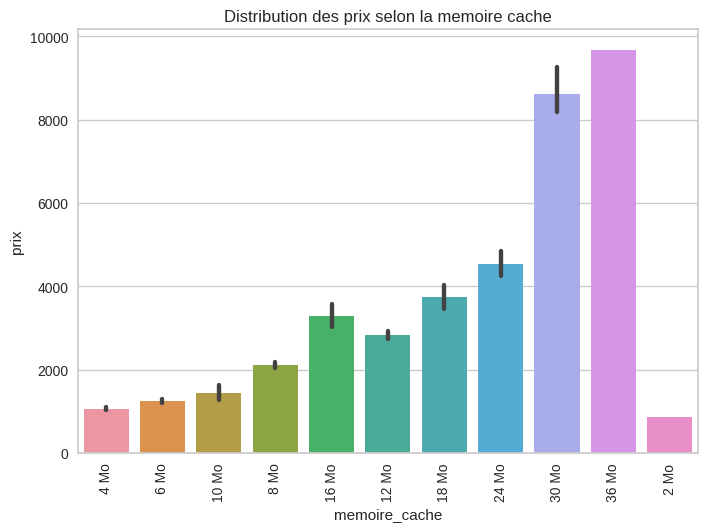

In [ ]:
#Distribution of Prices Based on memoire cache
sns.barplot(x=pc['memoire_cache'], y=pc['prix'])
plt.xticks(rotation='vertical')
plt.title('Distribution des prix selon la memoire cache')
plt.show()

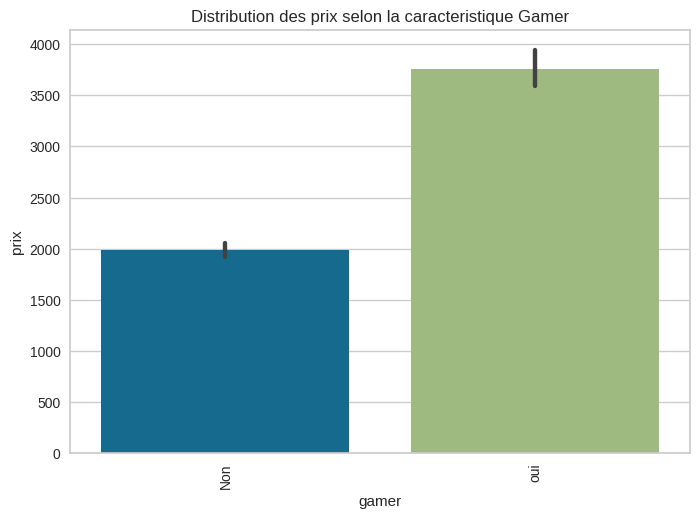

In [ ]:
#price with pc gamer or not
sns.barplot(x=pc['gamer'], y=pc['prix'])
plt.xticks(rotation='vertical')
plt.title('Distribution des prix selon la caracteristique Gamer')
plt.show()

##Formatting and transforming data

In [ ]:
#determining potential values of each column
pc.nunique()

marque               8
gamer                2
resolution          10
type_processeur     10
ref_proc            78
freq_processeur     92
memoire_cache       11
ram                  8
disque_dur          11
type_disk            5
carte_graphic        3
chipset_carte       24
grantie              3
prix               453
dtype: int64

In [ ]:
#converting the "grantie" and "gamer" variable into numerical data
pc['gamer']=pc['gamer'].map({"oui": 1 , "Non": 0})
pc['grantie']=pc['grantie'].map({"1 an": 1 , "2 ans": 2 ,"3 ans":3 })
pc

,marque,gamer,resolution,type_processeur,ref_proc,freq_processeur,memoire_cache,ram,disque_dur,type_disk,carte_graphic,chipset_carte,grantie,prix
2,LENOVO,0,1920 x 1080 pixels,Dual Core,Intel Core i3-10110U,2.10 GHz up to 4.10 GHz Turbo max,4 Mo,8 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,1,999.0
3,LENOVO,0,1920 x 1080 pixels,Dual Core,Intel® Core™ i3-10110U,"2,10 GHz up to 4,10 GHz Turbo max",4 Mo,12 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,1,999.0
4,DELL,0,1366 x 768 pixels,Dual Core,Intel® Core™ i3-1115G4,"3,00 GHz Up to 4,10 GHz Turbo max",6 Mo,8 Go,1 To HDD,HDD,Graphique Intégrée,Intel UHD,1,999.0
5,HP,0,1366 x 768 pixels,Dual Core,Intel® Core™ i3-1005G1,"1,20 GHz up to 3,40 GHz Turbo max",4 Mo,8 Go,1 To HDD,HDD,Graphique Intégrée,Intel HD,1,999.0
6,DELL,0,1366 x 768 pixels,Dual Core,Intel Core i3-1115G4,"3.00 GHz up to 4,10 GHz Turbo max",6 Mo,12 Go,1 To HDD,HDD,Graphique Intégrée,Intel HD,1,995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,LENOVO,0,1920 x 1080 pixels,Dual Core,AMD Athlon Silver 3050U,"2,3 GHz up to 3.2 GHz Turbo max",4 Mo,12 Go,1 To HDD,HDD,AMD Radeon,AMD Radeon,1,675.0
957,LENOVO,0,1920 x 1080 pixels,Dual Core,AMD Athlon Silver 3050U,"2,3 GHz up to 3.2 GHz Turbo max",4 Mo,4 Go,1 To HDD,HDD,AMD Radeon,AMD Radeon,1,655.0
958,LENOVO,0,1920 x 1080 pixels,Dual Core,AMD Athlon Silver 3050U,"2,3 GHz up to 3.2 GHz Turbo max",4 Mo,4 Go,1 To HDD,HDD,AMD Radeon,AMD Radeon,1,649.0
959,LENOVO,0,1920 x 1080 pixels,Dual Core,AMD Athlon Silver 3050U,"2,3 GHz up to 3.2 GHz Turbo max",4 Mo,4 Go,1 To HDD,HDD,AMD Radeon,AMD Radeon,1,649.0


In [ ]:
pc['memoire_cache'].value_counts()

12 Mo    260
8 Mo     252
6 Mo     150
4 Mo     113
16 Mo     66
24 Mo     65
18 Mo     22
10 Mo     13
30 Mo      3
36 Mo      1
2 Mo       1
Name: memoire_cache, dtype: int64

In [ ]:
pc['ram'].value_counts()

8 Go     297
16 Go    195
12 Go    124
24 Go    109
32 Go     81
20 Go     78
4 Go      57
40 Go      5
Name: ram, dtype: int64

In [ ]:
#extracting the numeric part of the two columns (memoire_cache and ram)
pc['memoire_cache']=pc['memoire_cache'].str[:-2]
pc['ram']=pc['ram'].str[:-2]

In [ ]:
#converting the type of the data into "int"
pc['memoire_cache']=pc['memoire_cache'].astype("int")
pc['ram']=pc['ram'].astype("int")

In [ ]:
pc

,marque,gamer,resolution,type_processeur,ref_proc,freq_processeur,memoire_cache,ram,disque_dur,type_disk,carte_graphic,chipset_carte,grantie,prix
2,LENOVO,0,1920 x 1080 pixels,Dual Core,Intel Core i3-10110U,2.10 GHz up to 4.10 GHz Turbo max,4,8,1 To HDD,HDD,Graphique Intégrée,Intel UHD,1,999.0
3,LENOVO,0,1920 x 1080 pixels,Dual Core,Intel® Core™ i3-10110U,"2,10 GHz up to 4,10 GHz Turbo max",4,12,1 To HDD,HDD,Graphique Intégrée,Intel UHD,1,999.0
4,DELL,0,1366 x 768 pixels,Dual Core,Intel® Core™ i3-1115G4,"3,00 GHz Up to 4,10 GHz Turbo max",6,8,1 To HDD,HDD,Graphique Intégrée,Intel UHD,1,999.0
5,HP,0,1366 x 768 pixels,Dual Core,Intel® Core™ i3-1005G1,"1,20 GHz up to 3,40 GHz Turbo max",4,8,1 To HDD,HDD,Graphique Intégrée,Intel HD,1,999.0
6,DELL,0,1366 x 768 pixels,Dual Core,Intel Core i3-1115G4,"3.00 GHz up to 4,10 GHz Turbo max",6,12,1 To HDD,HDD,Graphique Intégrée,Intel HD,1,995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,LENOVO,0,1920 x 1080 pixels,Dual Core,AMD Athlon Silver 3050U,"2,3 GHz up to 3.2 GHz Turbo max",4,12,1 To HDD,HDD,AMD Radeon,AMD Radeon,1,675.0
957,LENOVO,0,1920 x 1080 pixels,Dual Core,AMD Athlon Silver 3050U,"2,3 GHz up to 3.2 GHz Turbo max",4,4,1 To HDD,HDD,AMD Radeon,AMD Radeon,1,655.0
958,LENOVO,0,1920 x 1080 pixels,Dual Core,AMD Athlon Silver 3050U,"2,3 GHz up to 3.2 GHz Turbo max",4,4,1 To HDD,HDD,AMD Radeon,AMD Radeon,1,649.0
959,LENOVO,0,1920 x 1080 pixels,Dual Core,AMD Athlon Silver 3050U,"2,3 GHz up to 3.2 GHz Turbo max",4,4,1 To HDD,HDD,AMD Radeon,AMD Radeon,1,649.0


In [ ]:
pc['disque_dur'].value_counts()

512Go SSD          465
256 Go SSD         223
1 To HDD           162
1 To SSD            46
1To + 256Go SSD     32
1To + 512Go SSD     12
1To + 500Go SSD      2
512 Go               1
1To + 128Go SSD      1
2To SSD              1
64 Go eMMC           1
Name: disque_dur, dtype: int64

In [ ]:
#transfering disque_dur's data from "To" to "Go"

pc1=[]
for p in pc['disque_dur']:
   pc1.append( p.replace("1 To ", "1024 Go "))

pc2=[]
for p in pc1:
    pc2.append( p.replace("1To ", "1024 Go "))

pc3=[]
for p in pc2:
    pc3.append( p.replace("2To ", "2048 Go "))

pc['disque_dur']=pc3

In [ ]:
pc['disque_dur'].value_counts()

512Go SSD              465
256 Go SSD             223
1024 Go HDD            162
1024 Go SSD             46
1024 Go + 256Go SSD     32
1024 Go + 512Go SSD     12
1024 Go + 500Go SSD      2
512 Go                   1
1024 Go + 128Go SSD      1
2048 Go SSD              1
64 Go eMMC               1
Name: disque_dur, dtype: int64

In [ ]:
#converting the variable into numerical data

label_encoder_disque_dur= preprocessing.LabelEncoder()
label_encoder_marque = preprocessing.LabelEncoder()
label_encoder_type_processeur = preprocessing.LabelEncoder()
label_encoder_type_disk = preprocessing.LabelEncoder()
label_encoder_carte_graphic = preprocessing.LabelEncoder()
label_encoder_chipset_carte = preprocessing.LabelEncoder()


pc['disque_dur']= label_encoder_disque_dur.fit_transform(pc['disque_dur'])
pc['marque']= label_encoder_marque.fit_transform(pc['marque'])
pc['type_processeur']= label_encoder_type_processeur.fit_transform(pc['type_processeur'])
pc['type_disk']= label_encoder_type_disk.fit_transform(pc['type_disk'])
pc['carte_graphic']= label_encoder_carte_graphic.fit_transform(pc['carte_graphic'])
pc['chipset_carte']= label_encoder_chipset_carte.fit_transform(pc['chipset_carte'])


In [ ]:
pc['resolution'].value_counts()

1920 x 1080 pixels    791
1366 x 768 pixels     118
1920 x 1200 pixels     11
2560 x 1440 pixels      9
2560 x 1600 pixels      7
2880 x 1620 pixels      4
2880 x 1800 pixels      3
2160 x 1440 pixels      1
1920 x 1280 pixels      1
3840 x 2400 pixels      1
Name: resolution, dtype: int64

In [ ]:
#extracting only the numeric part of the data
pc['resolution']=pc['resolution'].str[:-7]
pc['resolution']

2      1920 x 1080
3      1920 x 1080
4       1366 x 768
5       1366 x 768
6       1366 x 768
          ...     
956    1920 x 1080
957    1920 x 1080
958    1920 x 1080
959    1920 x 1080
960    1920 x 1080
Name: resolution, Length: 946, dtype: object

In [ ]:
#create two columns for the screen's "width" and "height"
pc['screen_width']=pc['resolution'].str.split("x").apply(lambda x : x[0])
pc['screen_height']=pc['resolution'].str.split("x").apply(lambda x : x[1])
pc['screen_height'].value_counts()

 1080    791
 768     118
 1200     11
 1440     10
 1600      7
 1620      4
 1800      3
 1280      1
 2400      1
Name: screen_height, dtype: int64

In [ ]:
#converting the type of the data into "int"
pc['screen_width']=pc['screen_width'].astype("int")
pc['screen_height']=pc['screen_height'].astype("int")

In [ ]:
#dropping "resolution" column
pc=pc.drop(columns=['resolution'],axis=1)

In [ ]:
#extracting string of form "i\d+"

cleaned=[]
for i in pc['ref_proc']:
  clean_text = re.sub(r'[®|™|\xa0|\u200b]', '', i)
  cleaned.append(clean_text)
pc['ref_proc']=cleaned

pc['ref_proc'].unique()

array(['Intel Core i3-10110U', 'Intel Core i3-1115G4',
       'Intel Core i3-1005G1', 'AMD Ryzen 3 5300U', 'AMD Ryzen 3 3250U',
       'Intel Core i3-1215U', 'Intel Core i5-1035G1',
       'Intel Core i5-1135G7', 'AMD Ryzen 5 5500U', 'AMD Ryzen 7 5700U',
       'Intel Core i5-10210U', 'AMD Ryzen 5 5625U', 'Intel Core i5-1235U',
       'AMD Ryzen 7 4800H', 'Intel Core i5-1155G7',
       'Intel Core i7-1165G7', 'Intel Corei5-1135G7', 'AMD Ryzen 7 5825U',
       'Intel Core i7-10510U', 'Intel Core i7-1065G7',
       'AMD Ryzen 5 5600H', 'Intel Core i5-11320H', 'Intel Core i7-1260P',
       'Intel Core i7-1255U', 'Intel Core i5-11400H', 'AMD Ryzen 5 4600H',
       'AMD Ryzen 7 5800H', 'Intel Core i5-11260H', 'i5-1135G7',
       'Intel Core i5-12450H', 'Intel Core i5-10300H',
       'AMD Ryzen 5 6600H', 'Intel Core i5-11300H',
       'Intel Core i7-11800H', 'Intel Core i5-12500H',
       'Intel Core i7-12650H', 'Intel Corei5-12500H',
       'Intel Core i7-10870H', 'Intel Core i5-1145G7',
  

In [ ]:
#converting the variable into numerical data

label_encoder_ref_proc=preprocessing.LabelEncoder()
pc['ref_proc']= label_encoder_ref_proc.fit_transform(pc['ref_proc'])


In [ ]:
# pc.to_csv('data.csv',sep=';' ,index=False, encoding="utf-8")

In [ ]:
pc['freq_processeur'].value_counts()

2.40 GHz up to 4,20 GHz Turbo max    114
Up to 4,40 GHz Turbo max              96
3.00 GHz up to 4,10 GHz Turbo max     79
Up to 4,70 GHz Turbo max              64
2.80 GHz up to 4,70 GHz Turbo max     45
                                    ... 
Up to 4.70 GHz Turbo max               1
Up to 4.50 GHz Turbo max               1
2.6 GHz up to 3.8GHz Turbo max         1
1,80 GHz up to 4,00 GHz Turbo max      1
up to 4.70 GHz Turbo max               1
Name: freq_processeur, Length: 92, dtype: int64

In [ ]:
#select the max of processor's frequency
l=[]
l1=[]
for i in pc['freq_processeur']:
  substrings = i.split(' to')
  l.append(substrings)
for i in l:
  j= l.index(i)
  l1.append(l[j][1])

l1


[' 4.10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 3,40 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 3.8GHz Turbo max',
 ' 3.8 GHz Turbo max',
 ' 4.10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4.10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4.10 GHz Turbo max',
 ' 3,40 GHz Turbo max',
 ' 3.8 GHz Turbo max',
 ' 3.8 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 3,40 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 3.8 GHz Turbo max',
 ' 3.8 GHz Turbo max',
 ' 3,40 GHz Turbo max',
 ' 3.8GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4.10 GHz Turbo max',
 ' 4.10 GHz Turbo max',
 ' 3.8 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4.10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 3.5 GHz Turbo max',
 ' 4,10 GHz Turbo max',
 ' 

In [ ]:
#select only the numbers
l2=[]
for i in l1:
  numbers = re.findall(r'\d\.\d+|\d\,\d+', i)
  l2.append(numbers)
print(type(l2))

<class 'list'>


In [ ]:
#create a column containing the "max" of freq_processeur
pc['freq_processeur_max']= sum(l2, [])

In [ ]:
#convert ',' to '.'
x=[]
for i in pc['freq_processeur_max'] :
  x.append(i.replace(",", "."))
pc['freq_processeur_max']=x


In [ ]:
#converting the type of the data into "float"
pc['freq_processeur_max']=pc['freq_processeur_max'].astype("float")

In [ ]:
#droppind freq_processeur column
pc = pc.drop('freq_processeur', axis=1)

In [ ]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 2 to 960
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   marque               946 non-null    int64  
 1   gamer                946 non-null    int64  
 2   type_processeur      946 non-null    int64  
 3   ref_proc             946 non-null    int64  
 4   memoire_cache        946 non-null    int64  
 5   ram                  946 non-null    int64  
 6   disque_dur           946 non-null    int64  
 7   type_disk            946 non-null    int64  
 8   carte_graphic        946 non-null    int64  
 9   chipset_carte        946 non-null    int64  
 10  grantie              946 non-null    int64  
 11  prix                 946 non-null    float64
 12  screen_width         946 non-null    int64  
 13  screen_height        946 non-null    int64  
 14  freq_processeur_max  946 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 1

In [ ]:
pc

,marque,gamer,type_processeur,ref_proc,memoire_cache,ram,disque_dur,type_disk,carte_graphic,chipset_carte,grantie,prix,screen_width,screen_height,freq_processeur_max
2,6,0,6,20,4,8,4,0,1,23,1,999.0,1920,1080,4.1
3,6,0,6,20,4,12,4,0,1,23,1,999.0,1920,1080,4.1
4,2,0,6,21,6,8,4,0,1,23,1,999.0,1366,768,4.1
5,4,0,6,19,4,8,4,0,1,21,1,999.0,1366,768,3.4
6,2,0,6,21,6,12,4,0,1,21,1,995.0,1366,768,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,6,0,6,1,4,12,4,0,0,0,1,675.0,1920,1080,3.2
957,6,0,6,1,4,4,4,0,0,0,1,655.0,1920,1080,3.2
958,6,0,6,1,4,4,4,0,0,0,1,649.0,1920,1080,3.2
959,6,0,6,1,4,4,4,0,0,0,1,649.0,1920,1080,3.2


<Axes: >

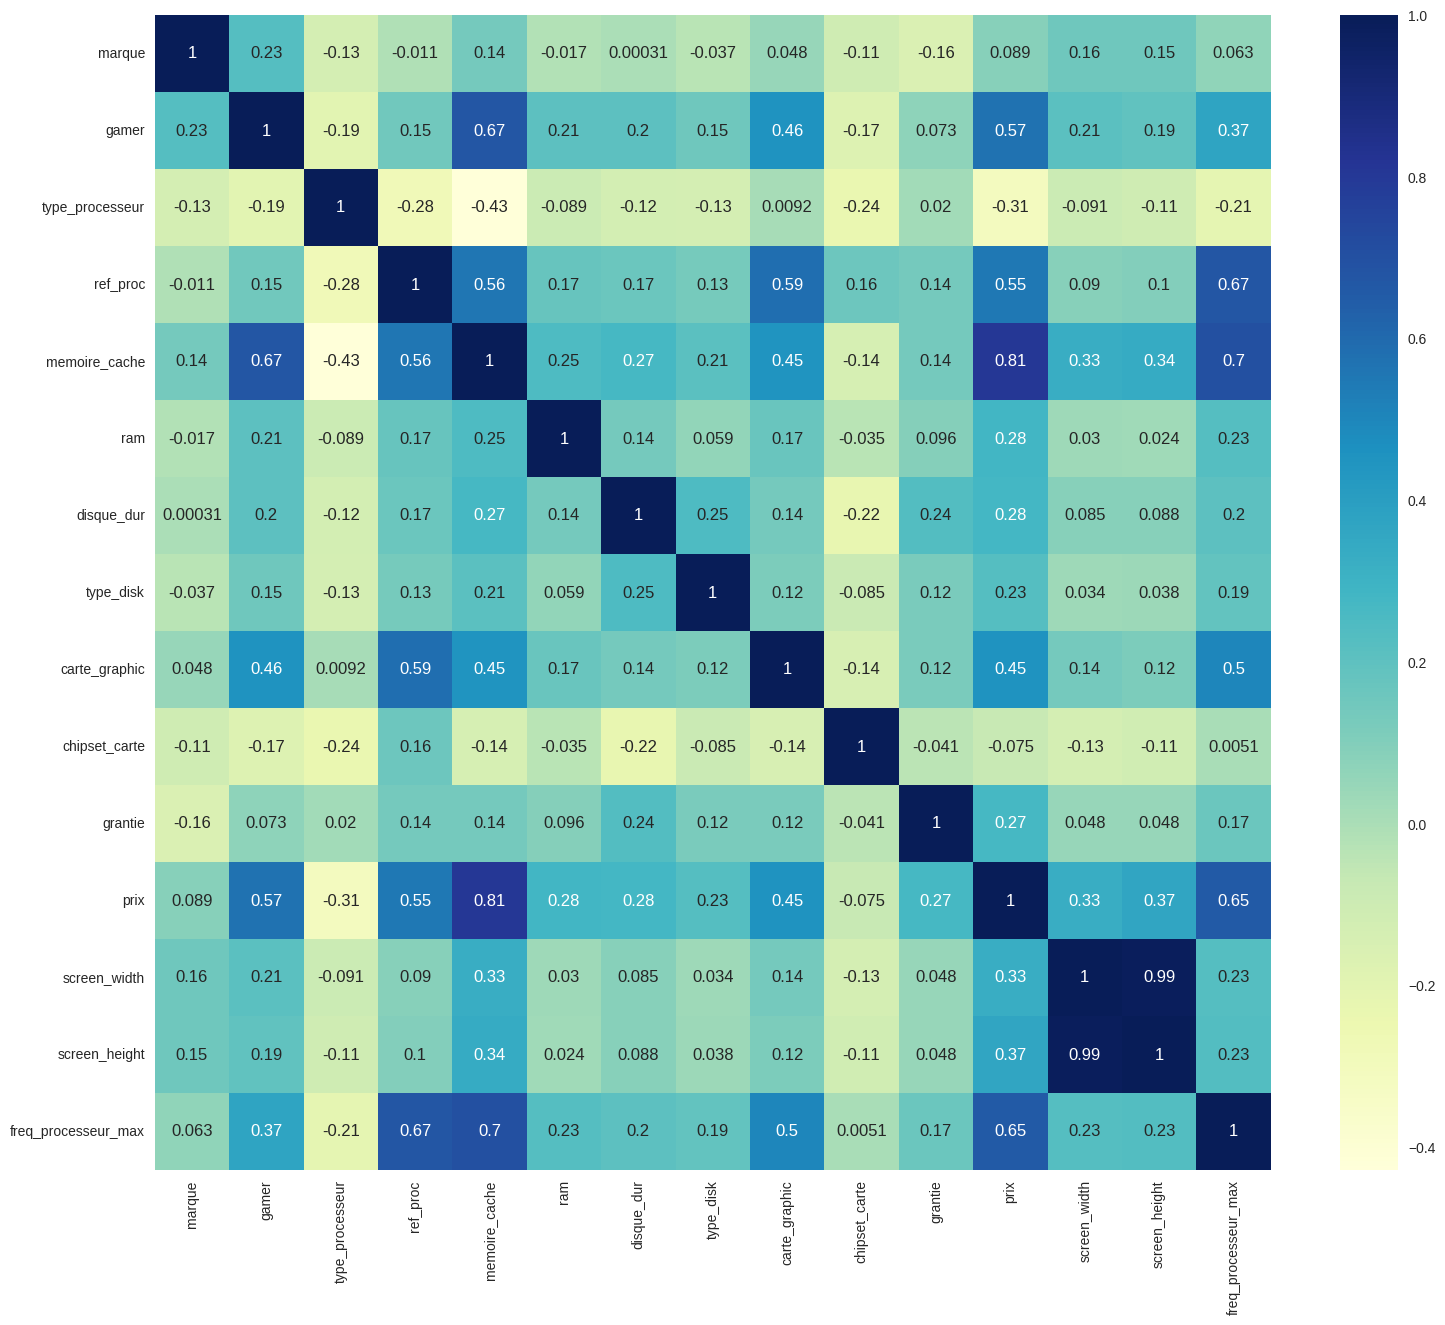

In [ ]:
#correlation between features
plt.figure(figsize=(18,15))
sns.heatmap(pc.corr(), annot=True , cmap="YlGnBu")

#4. Modelling

##Linear Regression

In [ ]:
#splitting our data
X=pc.drop(columns=["prix"])
y=pc["prix"].values[:,np.newaxis]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=19)

In [ ]:
#fitting our model
model=LinearRegression()
model.fit(X_train,y_train)

#make prediction
predicted=model.predict(X_test)

#calculate metrics
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 426919.4429068958
R squared 0.7087519264491121


##2 KNN

In [ ]:
#fitting our model
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

#make predictions
y_pred_knn=knn.predict(X_test)

#calculate metrics
print('Acuuracy=',accuracy_score(y_pred_knn,y_test))
print('precision_score=',metrics.precision_score(y_pred_knn,y_test, average='weighted'))
print('recall_score=',metrics.recall_score(y_pred_knn,y_test, average='weighted'))
print('f1_score=',metrics.f1_score(y_pred_knn,y_test, average='weighted'))
print('confusion_matrix=',metrics.confusion_matrix(y_pred_knn,y_test))

Acuuracy= 0.015789473684210527
precision_score= 0.06578947368421052
recall_score= 0.015789473684210527
f1_score= 0.02456140350877193
confusion_matrix= [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred_knn)
# confusion_df = pd.DataFrame(cm, index=['Actual'], columns=['Predicted'])
# sns.heatmap(confusion_df, annot=True, cmap='Blues')
# plt.title('Confusion Matrix')
# plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

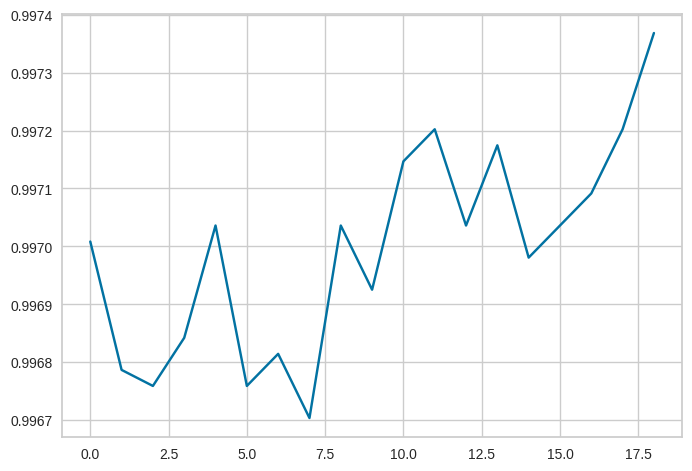

In [ ]:
#The optimal number of neighbors
error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.plot(error_rate)

##Decision tree

In [ ]:
#fitting our model
decision_tree = DecisionTreeClassifier(criterion="gini",random_state=19)
decision_tree.fit(X_train, y_train)

#make prediction
y_pred_dt=decision_tree.predict(X_test)

#calculate metrics
print("gini_accuracy={}".format(accuracy_score(y_test, y_pred_dt)))
print('precision_score=',metrics.precision_score(y_pred_dt,y_test, average='weighted'))
print('recall_score=',metrics.recall_score(y_pred_dt,y_test, average='weighted'))
print('f1_score=',metrics.f1_score(y_pred_dt,y_test, average='weighted'))
print('confusion_matrix=',metrics.confusion_matrix(y_pred_dt,y_test))

gini_accuracy=0.14210526315789473
precision_score= 0.18771929824561404
recall_score= 0.14210526315789473
f1_score= 0.15182121971595658
confusion_matrix= [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Random F

In [ ]:
#fitting our model
RF=RandomForestClassifier(n_estimators=200,random_state=19)
RF.fit(X_train, y_train)

#make prediction
y_pred_rf=RF.predict(X_test)

#calculate metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))
print('precision_score=',metrics.precision_score(y_pred_rf,y_test, average='weighted'))
print('recall_score=',metrics.recall_score(y_pred_rf,y_test, average='weighted'))
print('f1_score=',metrics.f1_score(y_pred_rf,y_test, average='weighted'))
print('confusion_matrix=',metrics.confusion_matrix(y_pred_rf,y_test))
print("MSE", mean_squared_error(y_test,y_pred_rf))
print("R squared", metrics.r2_score(y_test,y_pred_rf))

<ipython-input-59-dcc5ab0d07f0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


Accuracy: 0.13157894736842105
precision_score= 0.1692982456140351
recall_score= 0.13157894736842105
f1_score= 0.1387719298245614
confusion_matrix= [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
MSE 296152.9947368421
R squared 0.7979619091458383


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Improving our models

In [ ]:
y_test_min=[]
y_test_max=[]
for i in y_test :
  y_test_min.append(i-50)
  y_test_max.append(i+50)


In [ ]:
#linear regression
l=[]
for i in range(len(predicted)):
  if y_test_max[i] >= predicted[i] and y_test_min[i] <= predicted[i] :
    l.append(True)
  else:
    l.append(False)
my_series = pd.Series(l)
value_counts = my_series.value_counts()
Acc_lr=(value_counts[0] / len(l) )
print("the accuracy of KNN model =" , Acc_lr)

the accuracy of KNN model = 0.9315789473684211


In [ ]:
#KNN model
l=[]
for i in range(len(y_pred_knn)):
  if y_test_max[i] >= y_pred_knn[i] and y_test_min[i] <= y_pred_knn[i] :
    l.append(True)
  else:
    l.append(False)
my_series = pd.Series(l)
value_counts = my_series.value_counts()
Acc_knn=(value_counts[0] / len(l) )
print("the accuracy of KNN model =" , Acc_knn)


the accuracy of KNN model = 0.8421052631578947


In [ ]:
#Decision Tree model
l=[]
for i in range(len(y_pred_dt)):
  if y_test_max[i] >= y_pred_dt[i] and y_test_min[i] <= y_pred_dt[i] :
    l.append(True)
  else:
    l.append(False)
my_series = pd.Series(l)
value_counts = my_series.value_counts()
Acc_dt=(value_counts[0] / len(l) )
print("the accuracy of decision tree model =" , Acc_dt)

the accuracy of decision tree model = 0.6105263157894737


In [ ]:
#Random forest model
l=[]
for i in range(len(predicted)):
  if y_test_max[i] >= y_pred_rf[i] and y_test_min[i] <= y_pred_rf[i] :
    l.append(True)
  else:
    l.append(False)
my_series = pd.Series(l)
value_counts = my_series.value_counts()
Acc_rf=(value_counts[0] / len(l) )
print("the accuracy of random forest model =" , Acc_rf)

the accuracy of random forest model = 0.6157894736842106


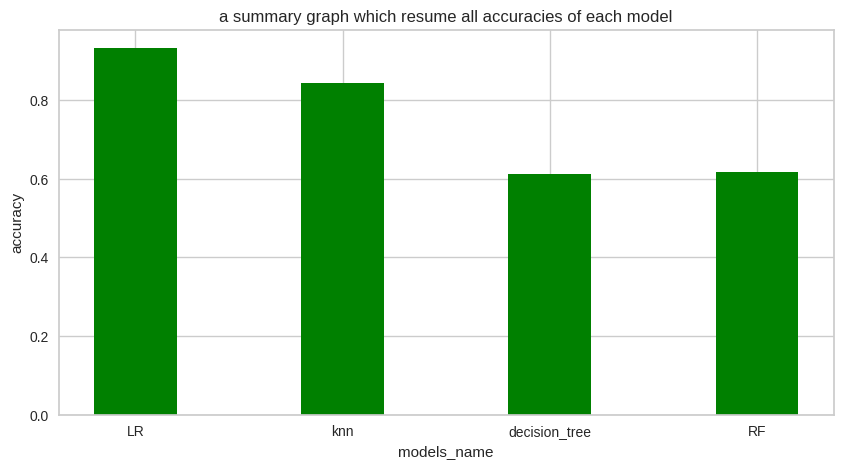

In [ ]:
data = { 'LR': Acc_lr,'knn':Acc_knn, 'decision_tree':Acc_dt,
        'RF':Acc_rf}
models_name  = list(data.keys())
accuracy = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(models_name, accuracy, color ='green',
        width = 0.4)

plt.xlabel("models_name")
plt.ylabel("accuracy")
plt.title("a summary graph which resume all accuracies of each model")
plt.show()

#5. Streamlit app

In [ ]:
chipset_intel=['Intel UHD','Intel Iris X','Intel HD']
chipset_nvidea=['GeForce MX330','GeForce RTX 3050','GeForce MX450','GeForce MX350','GeForce MX550','GeForce GTX 1650','GeForce RTX 3060','GeForce RTX 3050Ti','GeForce RTX 2050','GeForce RTX 4050','GeForce RTX 4060','GeForce RTX 4070','GeForce RTX 3070TI','GeForce RTX 3080 Ti','GeForce RTX 3070','GeForce GTX 1660Ti']
chipset_Amd=['AMD Radeon','AMD Radeon RX 6600 M','AMD Radeon RX 6500M','AMD Radeon Vega 7','AMD Radeon RX 6850M XT']
intelPros=['Intel Celeron N3350', 'Intel Celeron N4120', 'Intel Core i3-1005G1', 'Intel Core i3-10110U', 'Intel Core i3-1115G4', 'Intel Core i3-1215U', 'Intel Core i5-10210U', 'Intel Core i5-1035G1', 'Intel Core i5-1135G7', 'Intel Core i5-11400H', 'Intel Core i5-1145G7', 'Intel Core i5-1155G7', 'Intel Core i5-11260H', 'Intel Core i5-11300H', 'Intel Core i5-11320H', 'Intel Core i5-12450H', 'Intel Core i5-12500H', 'Intel Core i7-10510U', 'Intel Core i7-1065G7', 'Intel Core i7-10750H', 'Intel Core i7-10870H', 'Intel Core i7-1165G7', 'Intel Core i7-11800H', 'Intel Core i7-1185G7', 'Intel Core i7-1255U', 'Intel Core i7-1260P', 'Intel Core i7-1265U', 'Intel Core i7-12700H', 'Intel Core i7-13700H', 'Intel Core i7-13700HX', 'Intel Core i9-11900H', 'Intel Core i9-12900H', 'Intel Core i9-13950HX']
amdPros=['AMD 3020e', 'AMD Athlon Silver 3050U', 'AMD Ryzen 3 3250U', 'AMD Ryzen 5 4600H', 'AMD Ryzen 5 5500U', 'AMD Ryzen 5 5600H', 'AMD Ryzen 5 5625U', 'AMD Ryzen 5 6600H', 'AMD Ryzen 7 4800H', 'AMD Ryzen 7 5700U', 'AMD Ryzen 7 5800H', 'AMD Ryzen 7 5800HS', 'AMD Ryzen 7 6800H', 'AMD Ryzen 7 6800HS', 'AMD Ryzen 9 6900HX']

resoo=['1920 x 1080', '1366 x 768', '2880 x 1620', '1920 x 1200', '2160 x 1440', '2560 x 1600', '2880 x 1800', '2560 x 1440','1920 x 1280', '3840 x 2400']

#Building our application

#title of app
st.title("prédiction du prix d'un PC")

#brand of pc
Marque=st.selectbox('Marque',['LENOVO','HP','ASUS','DELL','MSI','ACER','HUAWEI','GIGABYTE'])

#memoire_cache
mm_cache=st.selectbox('Memoire cache (en Mo) ',['2','4','6','8','10','12','16','18','24','30','36'])

#frq_proc
frq_proc=st.selectbox('Fréquence du processeur maximale',['4.20','4.70','4.10','4.40','4.50','3.40','3.90','4.60','3.60','5.00','4.90','4.80','4.00','5.50'])




#ram
ram=st.selectbox('RAM(en Go)',['4','8','12','16','20','24','32','40'])

#type proc
tproc=st.selectbox('Nombre des Coeurs', ['Quad Core','Dual Core','Hexa Core','Octa Core','Dix Core','10 cœurs','12 cœurs','14 Cœurs','16 Cœurs','24 Coeurs'])



#tdisq
tdisq=st.selectbox('Type du disque dur',['SSD','HDD','SSD + HDD','SSHD','eMMC'])
if(tdisq=='SSD'):
   disq=st.selectbox('Stockage de Disque dur', ['256 Go SSD','512Go SSD','1024 Go SSD','2048 Go SSD'])
elif(tdisq=='HDD'):
   disq=st.selectbox('Stockage de Disque dur', ['512 Go','1024 Go HDD'])
elif(tdisq=='SSD + HDD'):
   disq=st.selectbox('Stockage de Disque dur', ['1024 Go + 128Go SSD','1024 Go + 256Go SSD','1024 Go + 500Go SSD','1024 Go + 512Go SSD'])
elif(tdisq=='SSHD'):
   disq=st.selectbox('Stockage de Disque dur', ['512Go SSD'])
else:
   disq=st.selectbox('Stockage de Disque dur', ['64 Go eMMC'])


#carte_graph
carte_graph=st.selectbox('Carte graphique',['Graphique Intégrée','Nvidia GeForce','AMD Radeon'])

if(carte_graph=='Graphique Intégrée'):
   cicaGraphique=st.selectbox('Chipset carte Graphique Intel',chipset_intel)
elif(carte_graph=='Nvidia GeForce'):
   cicaGraphique=st.selectbox('Chipset carte Graphique Nvidea',chipset_nvidea)
else:
   cicaGraphique=st.selectbox('Chipset carte Graphique AMD',chipset_Amd)


#ref_proc
type_pros=st.selectbox('Type du processeur',['Intel Core','AMD'])
if(type_pros=='AMD'):
   ref_pros=st.selectbox('Référence du processeur',amdPros)
else:
   ref_pros=st.selectbox('Référence du processeur',intelPros)


#resolution
display=st.selectbox("Dimension de l'écran", resoo)
width, height = display.split(' x ')


#pc_type(gamer or not)
Gamer=st.selectbox('Gamer',['Oui','Non'])
if (Gamer == 'Oui'):
  gamer=1
else :
  gamer=0

#garantie
gar=st.selectbox('Garantie', ['1 an','2 ans','3ans'])
if(gar=='1 an'):
  garantiee=1
elif(gar=='2 ans'):
  garantiee=2
else:
  garantiee=3


# Label encoder of the selected item

disq_dur=label_encoder_disque_dur.transform([disq])
marque=label_encoder_marque.transform([Marque])
type_proc=label_encoder_type_processeur.transform([tproc])
type_disk=label_encoder_type_disk.transform([tdisq])
carte_graphique=label_encoder_carte_graphic.transform([carte_graph])
cipset_CG=label_encoder_chipset_carte.transform([cicaGraphique])
ref_pross=label_encoder_ref_proc.transform([ref_pros])


disq_dur=disq_dur[0]
marque=marque[0]
type_proc=type_proc[0]
type_disk=type_disk[0]
carte_graphique=carte_graphique[0]
cipset_CG=cipset_CG[0]
ref_pross=ref_pross[0]




# build list of feature


data = {
    'marque': [marque],
    'gamer': [gamer],
    'type_processeur': [type_proc],
    'ref_proc': [ref_pross],
    'memoire_cache': [mm_cache],
    'ram': [ram],
    'disque_dur': [disq_dur],
    'type_disk': [type_disk],
    'carte_graphic': [carte_graphique],
    'chipset_carte': [cipset_CG],
    'grantie': [garantiee],
    'screen_width': [width],
    'screen_height': [height],
    'freq_processeur_max': [frq_proc]
}

df = pd.DataFrame(data)


if st.button('prédiction du prix') :
      y_pr=model.predict(df)
      st.markdown("Le prix du pc est " + str(y_pr[0]) +  "  DT")




# Create a sidebar
st.sidebar.title("Go my code's project graduation")

# Add creator signature
st.sidebar.text("Created by Ines Atoui. \n (AkRoUb).")






2023-05-19 08:08:35.316 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())